# Ch3. 신경망

## 3.2. 활성화 함수

In [1]:
# 계단 함수

def step_function(x):
    if x>0 :
        return 1
    else:
        return 0

In [2]:
# numpy ver 계단 함수

def step_function(x):
    y = x > 0
    return y.astype(np.int)

In [4]:
import numpy as np

x = np.array([-1.0, 1.0, 2.0])
y = x>0
print(x,y)

[-1.  1.  2.] [False  True  True]


In [5]:
# bool -> int
# True : 1, False : 0

y = y.astype(np.int)
y

<ipython-input-5-9f962d9dbdc0>:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = y.astype(np.int)


array([0, 1, 1])

<ipython-input-6-0249038d9340>:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return np.array(x>0, dtype=np.int)


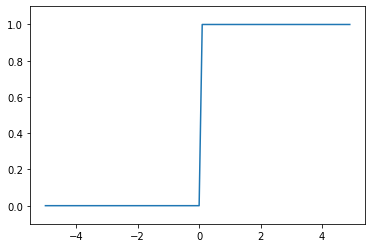

In [6]:
import numpy as np
import matplotlib.pylab as plt

def step_function(x):
    return np.array(x>0, dtype=np.int)

x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)

plt.plot(x,y)
plt.ylim(-0.1, 1.1)
plt.show()

In [8]:
# 시그모이드 함수

def sigmoid(x):
    return  1/(1 + np.exp(-x))

In [9]:
# sigmoid 적용

x = np.array([-1.0, 1.0, 2.0])
sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

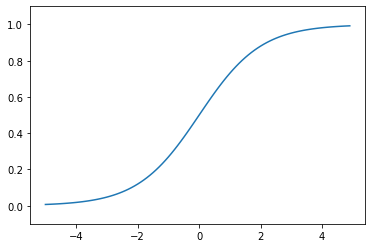

In [10]:
# sigmoid graph

x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

In [16]:
# ReLU

def relu(x):
    return np.maximum(0,x)

In [19]:
relu(-4)

0

## 3.3. 다차원 배열의 계산

In [20]:
# 1차원 배열

import numpy as np

A = np.array([1,2,3,4])
print(A)

[1 2 3 4]


In [22]:
# 배열의 차원

np.ndim(A)

1

In [23]:
# 배열의 shape -> tuple

A.shape

(4,)

In [24]:
A.shape[0]

4

In [26]:
# 2차원 배열

B = np.array([[1,2], [3,4], [5,6]])

print(B)
print()
print(np.ndim(B))
print()
print(B.shape)

[[1 2]
 [3 4]
 [5 6]]

2

(3, 2)


In [27]:
# 행렬 곱
# 교환법칙 불가

A = np.array([[1,2], [3,4]])
B = np.array([[5,6], [7,8]])
np.dot(A,B)

array([[19, 22],
       [43, 50]])

In [28]:
# 행렬 곱으로 신경망 연산

# input X
X = np.array([1,2])

# weight W
# [X1에 대한 weight, X2에 대한 weight]
W = np.array([[1,3,5], [2,4,6]])

# Output Y
Y = np.dot(X,W)
print(Y)

[ 5 11 17]


## 3.4. 3층 신경망 구현하기

In [29]:
# x1, x2 -> 3개 노드로 구성된 첫번째 layer A1

X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]]) # [[x1->], [x2->]]
B1 = np.array([0.1, 0.2, 0.3])

print(W1.shape)
print(X.shape)
print(B1.shape)

A1 = np.dot(X,W1) + B1
print()
print(A1)

(2, 3)
(2,)
(3,)

[0.3 0.7 1.1]


In [30]:
# A1 노드들 -> 활성화 함수 -> Z1
Z1 = sigmoid(A1)

print(A1)
print(Z1)

[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]


In [31]:
# 첫 번째 layer 통과한 Z1 -> 2개 노드로 구성된 두 번째 layer A2

# Weight - Z1, A2 사이
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])  

# Bias - Z1, A2 사이
B2 = np.array([0.1, 0.2])

print(Z1.shape)
print(W2.shape)
print(B2.shape)

A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)

print(A2)
print(Z2)

(3,)
(3, 2)
(2,)
[0.51615984 1.21402696]
[0.62624937 0.7710107 ]


In [32]:
# 두 번째 layer -> 출력 layer y1, y2

# 활성화 함수 새로 정의 - 항등함수, 시그모이드 함수, 소프트맥스 함수 등 필요에 따라
# 항등 함수 identity_function()
# 입력 그대로 출력하는 함수

def identity_function(x):
    return x

# Weight - Z2, Y 사이
W3 = np.array([[0.1, 0.3], [0.2, 0.4]])

# Bias - Z2, Y 사이
B3 = np.array([0.1, 0.2])

A3 = np.dot(Z2, W3) + B3
Y = identity_function(A3)

print(A3)
print(Y)

[0.31682708 0.69627909]
[0.31682708 0.69627909]


In [33]:
# 신경망 순방향 구현

# 초기화 
def init_network():
    # 변수 저장할 dictionary
    network = {}
    
    # W, b 정보 저장
    # 노드 수 변화: 2(input) -> 3 -> 2 -> 2(output)
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])
    
    return network

# forward propagation
def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)  # 항등 함수
    
    return y

# dictionary 만들기
network = init_network()

# input
x = np.array([1.0, 0.5])

# get output
y = forward(network, x)

print(y)

[0.31682708 0.69627909]


## 3.5. 출력층 설계하기

In [2]:
import numpy as np

In [3]:
# Softmax

# 출력층 직전 layer로부터 오는 입력
a = np.array([0.3, 2.9, 4.0])

exp_a = np.exp(a)
print(exp_a)

# exp 함수 합
sum_exp_a = np.sum(exp_a)
print(sum_exp_a)

# softmax
y = exp_a / sum_exp_a
print(a)

[ 1.34985881 18.17414537 54.59815003]
74.1221542101633
[0.3 2.9 4. ]


In [4]:
# Softmax function

def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

In [5]:
# Softmax with Overflow

a = np.array([1010, 1000, 990])
np.exp(a) / np.sum(np.exp(a))

C:\Users\bhi\AppData\Local\Temp/ipykernel_11308/3051888868.py:4: RuntimeWarning: overflow encountered in exp
  np.exp(a) / np.sum(np.exp(a))
C:\Users\bhi\AppData\Local\Temp/ipykernel_11308/3051888868.py:4: RuntimeWarning: invalid value encountered in true_divide
  np.exp(a) / np.sum(np.exp(a))


array([nan, nan, nan])

In [6]:
# 최댓갑 빼주기

c = np.max(a)
a - c

array([  0, -10, -20])

In [7]:
np.exp(a-c)/np.sum(np.exp(a-c))

array([9.99954600e-01, 4.53978686e-05, 2.06106005e-09])

In [8]:
# Softmax without Overflow

def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a-c)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

In [9]:
# 확률로 해석 가능한 소프트맥스

a = np.array([0.3, 2.9, 4.0])
y = softmax(a)
print(y)

[0.01821127 0.24519181 0.73659691]


In [10]:
np.sum(y)

1.0

## 3.6. 손글씨 숫자 인식

In [23]:
import sys, os
# sys.path.append(os.dir)    # 부모 디렉터리 파일 가져오기

from mnist import load_mnist 
# mnist 데이터 -> (train image, train label) , (test image, test label)
# normalize, flatten, one_hot_label

# train, test dataset
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

# 각 데이터 형상 출력
print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

Done
Done
Done
Done
Converting train-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...
Done
Converting t10k-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting t10k-labels-idx1-ubyte.gz to NumPy Array ...
Done
Creating pickle file ...
Done!
(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [27]:
# mnist_show.py

import sys, os
# sys.path.append(os.pardir)

import numpy as np
from mnist import load_mnist
from PIL import Image

# image show function
def img_show(img):
    
    # PIL 용 데이터 객체로 변환
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()
    
# train test split
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

img = x_train[0]
label = t_train[0]
print(label)

# flatten -> 784
print(img.shape)

# 원래 이미지 모양으로
img = img.reshape(28, 28)
print(img.shape)

img_show(img)

5
(784,)
(28, 28)


In [28]:
# Sigmoid

def sigmoid(x):
    y = 1/(1+np.exp(-x))
    
    return y

In [32]:
# 신경망 추론 처리 함수 with MNIST

import pickle

def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test

# network 초기화
# 매개변수 불러오기 from pkl
def init_network():
    with open("sample_weight.pkl", "rb") as f:
        network = pickle.load(f)
    
    return network

def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)

    return y

In [33]:
# 신경망에 의한 추론 수행
# 정확도 평가

x, t = get_data()
network = init_network()

accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])
    
    # 확률 가장 높은 원소의 index
    p = np.argmax(y)
    
    # label 일치
    if p == t[i]:
        accuracy_cnt += 1

print("Accuracy: " + str(float(accuracy_cnt) / len(x))) 

Accuracy: 0.9352


In [34]:
# 신경망 각 층의 가중치 형상 출력
# bias 생략

x, _ = get_data()
network = init_network()
W1, W2, W3 = network['W1'], network['W2'], network['W3']

print(x.shape)
print(x[0].shape)    # train data 이미지 1개 pixel 수
print(W1.shape)      # hidden layer1 노드 50개
print(W2.shape)      # hidden layer2 노드 100개
print(W3.shape)      # 10 개 클래스로 연결

(10000, 784)
(784,)
(784, 50)
(50, 100)
(100, 10)


In [35]:
# 배치 처리 -> 여러 개 한 번에 입력

x, t = get_data()
network = init_network()

batch_size = 100
accuracy_cnt = 0

# batch size 만큼씩 한 번에 계산
for i in range(0, len(x), batch_size):
    x_batch = x[i:i+batch_size]
    y_batch = predict(network, x_batch)
    
    # 10 클래스에대해 나온 값 중 max의 index => pgb
    # p 는 길이 100 의 column vector
    p = np.argmax(y_batch, axis=1)
    accuracy_cnt += np.sum(p == t[i:i+batch_size])
    
print("Accuracy: " + str(float(accuracy_cnt)/len(x)))

Accuracy: 0.9352


In [37]:
y_batch.shape

(100, 10)

In [38]:
p.shape

(100,)

In [39]:
p

array([8, 9, 0, 1, 2, 9, 4, 5, 6, 7, 8, 0, 1, 2, 3, 4, 7, 8, 9, 7, 8, 6,
       4, 1, 9, 2, 8, 4, 4, 7, 0, 1, 9, 2, 8, 7, 8, 2, 6, 0, 0, 6, 3, 5,
       9, 9, 1, 4, 0, 6, 1, 0, 0, 6, 2, 1, 1, 7, 7, 8, 4, 6, 0, 7, 0, 3,
       6, 8, 7, 1, 3, 2, 4, 9, 4, 3, 6, 4, 1, 7, 2, 6, 2, 0, 1, 2, 8, 4,
       5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6], dtype=int64)

In [40]:
# bool 배열 -> sum 으로 True 개수 세기

y = np.array([1, 2, 1, 0])
t = np.array([1, 2, 0, 0])

print(y==t)
np.sum(y==t)

[ True  True False  True]


3